In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HNL_newtry as HNL
import pylhe

events_mass_10 = list(pylhe.readLHE('HNL_M (10).lhe')) #contains 10^5 samples
events_mass_20 = list(pylhe.readLHE('HNL_M (20).lhe'))
events_mass_30 = list(pylhe.readLHE('HNL_M (30).lhe'))
events_mass_40 = list(pylhe.readLHE('HNL_M (40).lhe')) 
events_mass_50 = list(pylhe.readLHE('HNL_M (50).lhe'))
events_mass_60 = list(pylhe.readLHE('HNL_M (60).lhe'))
events_mass_70 = list(pylhe.readLHE('HNL_M (70).lhe')) #contains 5*10^4 samples

In [2]:
Sample_size = 5*10**4

#Making first data set
Data_params_1 = np.array(HNL.sort_data(events_mass_10,Sample_size))

Learn_size = int(np.ceil(len(Data_params_1[0])))
s_Data_params_1 =Data_params_1[:,0:Learn_size]

Data_params_2 = np.array(HNL.sort_data(events_mass_20,Sample_size))
s_Data_params_2 =Data_params_2[:,0:Learn_size]

Data_params_3 = np.array(HNL.sort_data(events_mass_30,Sample_size))
s_Data_params_3 =Data_params_3[:,0:Learn_size]

Data_params_4 = np.array(HNL.sort_data(events_mass_40,Sample_size))
s_Data_params_4 =Data_params_4[:,0:Learn_size]

Data_params_5 = np.array(HNL.sort_data(events_mass_50,Sample_size))
s_Data_params_5 =Data_params_5[:,0:Learn_size]

Data_params_6 = np.array(HNL.sort_data(events_mass_60,Sample_size))
s_Data_params_6 =Data_params_6[:,0:Learn_size]

Data_params_7 = np.array(HNL.sort_data(events_mass_70,Sample_size))
s_Data_params_7 =Data_params_7[:,0:Learn_size]

#Combining them
#s_data = s_Data_params_1.T


In [22]:
s_data = np.concatenate((s_Data_params_1.T,s_Data_params_2.T,s_Data_params_3.T,s_Data_params_4.T\
                         ,s_Data_params_5.T,s_Data_params_6.T,s_Data_params_7.T))

p1 = np.array([s_data.T[0],s_data.T[1],s_data.T[2],s_data.T[3]])
p2 = np.array([s_data.T[4],s_data.T[5],s_data.T[6],s_data.T[7]])
q = np.array([s_data.T[8],s_data.T[9],s_data.T[10],s_data.T[11]])
n = np.array([s_data.T[12],s_data.T[13],s_data.T[14],s_data.T[15]])
m = s_data.T[16]
mw = s_data.T[17]
ppi = HNL.find_decay(p1,p2,q)[0]
ptaun = HNL.find_decay(p1,p2,q)[1]

In [72]:
def trm(p1,p2):
    ET1 = np.sqrt(p1[1]**2+p1[2]**2)
    ET2 = np.sqrt(p2[1]**2+p2[2]**2)
    return np.sqrt((ET1+ET2)**2-(p1[1]+p2[1])**2-(p1[2]+p2[2])**2)

def prapid(p):
    with np.errstate(divide='ignore'):
        pAbs = np.sqrt(p[1]**2 + p[2]**2 + p[3]**2)
        return np.arctanh(p[3] / pAbs)

def make_set(p1,p2,q,n,N):
    list = np.zeros([5,N])
    E = p1[0]+p2[0]+q[0]
    pT = (p1[1]+p2[1]+q[1])**2+(p1[2]+p2[2]+q[2])**2
    nd = np.array([-p1[1],-p1[2],q[3]+p2[3]+n[3]])
    nu = np.sqrt(nd[0]**2+nd[1]**2+nd[2]**2)
    vn = np.array([-p1[1],-p1[2],p2[3]+q[3]+n[3]])/np.sqrt(p1[1]**2+p1[2]**2+(p2[3]+q[3]+n[3])**2)
    pn = np.array([p2[1]+q[1],p2[2]+q[2],p2[3]+q[3]])   
    cross = np.array([vn[2]*pn[1]-vn[1]*pn[2],vn[0]*pn[2]-vn[2]*pn[0],vn[1]*pn[0]-vn[0]*pn[1]])
    q1 = np.sqrt(cross[0]**2+cross[1]**2+cross[2]**2)
    q2 = pn[0]*vn[0]+pn[1]*vn[1]+pn[2]*vn[2] 
    pz = p1[1]*vn[0]+p1[2]*vn[1]+p1[3]*vn[2]
    E1 = p1[0]
    E2 = p2[0]+q[0]
    B = (pz+q2)/(E1+E2)
    mpt =np.array([0,-p1[1]-p2[1]-q[1],-p1[2]-p2[2]-q[2]])
    nf = np.array([0,-p1[1]/nu,-p1[2]/nu,(q[3]+p2[3]+n[3])/nu])
    y = HNL.find2(p1,p2,q,82)
    
    list[:][0] = y[0][1]/(p1[0]+p2[0]+q[0])
    list[:][1] = y[1][1]/(p1[0]+p2[0]+q[0])
    list[:][2] = (q[3]+p2[3]+y[0][0])/np.sqrt(p1[1]**2+p1[2]**2+(q[3]+p2[3]+y[0][0])**2)
    list[:][3] = (q[3]+p2[3]+y[1][0])/np.sqrt(p1[1]**2+p1[2]**2+(q[3]+p2[3]+y[1][0])**2)
    list[:][4] = (q[3]+p2[3]+n[3])/nu

    return list



In [47]:
print(x_train[:,4].shape)

for i in range(len(x_train[:,4])):
    if np.isnan(x_train[i,3]) == True:
        print(i)

(194070,)


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

set1 = np.array(make_set(p1,p2,q,n,len(p1[0]))).T

x_train, x_test,y_train, y_test, E_train, E_test = train_test_split(set1,m/(p1[0]+p2[0]+q[0]),(p1[0]+p2[0]+q[0]),train_size = 0.8)

#(1400,200)
Model = MLPRegressor(hidden_layer_sizes=(1000),activation='relu',max_iter = 100,alpha =5.0e-06,verbose=True\
                     , learning_rate_init= 0.001, solver = 'adam',batch_size = 1000, random_state= 4,warm_start = True,tol = 10**(-8))


In [84]:
Model.fit(x_train,y_train)

Iteration 1, loss = 0.00361739
Iteration 2, loss = 0.00039009
Iteration 3, loss = 0.00031123
Iteration 4, loss = 0.00027524
Iteration 5, loss = 0.00025225
Iteration 6, loss = 0.00023582
Iteration 7, loss = 0.00022252
Iteration 8, loss = 0.00021201
Iteration 9, loss = 0.00020877
Iteration 10, loss = 0.00020202
Iteration 11, loss = 0.00019134
Iteration 12, loss = 0.00018820
Iteration 13, loss = 0.00018588
Iteration 14, loss = 0.00018406
Iteration 15, loss = 0.00018251
Iteration 16, loss = 0.00017660
Iteration 17, loss = 0.00017627
Iteration 18, loss = 0.00017764
Iteration 19, loss = 0.00017349
Iteration 20, loss = 0.00017029
Iteration 21, loss = 0.00017634
Iteration 22, loss = 0.00016955
Iteration 23, loss = 0.00016378
Iteration 24, loss = 0.00016684
Iteration 25, loss = 0.00016324
Iteration 26, loss = 0.00016296
Iteration 27, loss = 0.00015807
Iteration 28, loss = 0.00015765
Iteration 29, loss = 0.00016051
Iteration 30, loss = 0.00016662
Iteration 31, loss = 0.00015797
Iteration 32, los

C:\Users\rasat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(activation='relu', alpha=5e-06, batch_size=1000, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=1000, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=4, shuffle=True, solver='adam',
             tol=1e-08, validation_fraction=0.1, verbose=True, warm_start=True)

<Figure size 432x288 with 0 Axes>

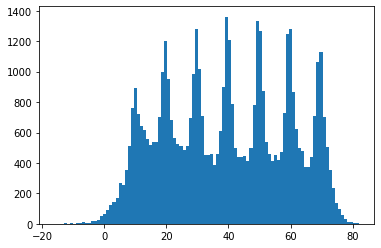

<Figure size 432x288 with 0 Axes>

In [82]:
plt.hist(Model.predict(x_test)*E_test,bins=100)
plt.figure()